#### Pandas Indexing, Grouping, and Aggregating Homework

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd

titanic = sns.load_dataset('titanic')  #import dataset 

Exploring the Dataset: a. Display the first 10 rows of the dataset. b. How many rows and columns does the dataset have?

Using .loc and .iloc methods: a. Select the rows from index 5 to 15 and columns "age" and "fare" using the .loc method. b. Select the first 5 rows and first 3 columns using the .iloc method. c. Find the age of the passenger at the 100th index using .iloc.

Using groupby() and aggregate() methods: a. Group the dataset by 'sex' and find the mean age for each gender. b. Group the dataset by 'class' (passenger class) and find the maximum and minimum age in each class. c. Group the dataset by both 'sex' and 'class'. Find the total number of passengers and the average fare for each group.

Using Pivot Tables: a. Create a pivot table that shows the median age of passengers for each combination of 'sex' and 'class'. b. Create another pivot table that shows the total fare collected for each combination of 'embark_town' and 'deck'. c. Plot a heatmap using seaborn to visualize the results of any one of the above pivot tables.

### 1. Exploring Dataset: 

In [18]:
titanic.loc[0:9]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [20]:
np.shape(titanic) #there are 891 rows and 15 columns

(891, 15)

### 2. Using .loc and .iloc methods:

In [ ]:
# a. Select the rows from index 5 to 15 and columns "age" and "fare" using the .loc method.

In [23]:
titanic.loc[5:15, ["age","fare"]]

,age,fare
5,NaN,8.4583
6,54.0,51.8625
7,2.0,21.0750
8,27.0,11.1333
9,14.0,30.0708
10,4.0,16.7000
11,58.0,26.5500
12,20.0,8.0500
13,39.0,31.2750
14,14.0,7.8542


In [24]:
# b. Select the first 5 rows and first 3 columns using the .iloc method.

In [25]:
titanic.iloc[:5, :3]

,survived,pclass,sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


In [26]:
# c. Find the age of the passenger at the 100th index using .iloc.

In [33]:
titanic.iloc[100, 3]

28.0

### 3. Using groupby() and aggregate() methods:

In [34]:
# a. Group the dataset by 'sex' and find the mean age for each gender.

In [67]:
temp_df= titanic[['age', 'sex']] #make temp dataframe containing sex and age colunmns only

our_sum=temp_df.groupby('sex').aggregate('mean') #group by sex, then find mean 

our_sum

,age
sex,
female,27.915709
male,30.726645


In [51]:
# b. Group the dataset by 'class' (passenger class) and find the maximum and minimum age in each class.

In [55]:
temp_df= titanic[['class', 'age']] #make temp dataframe containing class and age colunmns only

our_sum=temp_df.groupby('class').aggregate(['max','min']) #group by class, then use aggregate to find max/min 

our_sum

age      
         max   min
class             
First   80.0  0.92
Second  70.0  0.67
Third   74.0  0.42

In [56]:
# c. Group the dataset by both 'sex' and 'class'. Find the total number of passengers and the average fare for each group.

In [59]:
temp_df= titanic[['class', 'sex', 'fare']] #make temp dataframe containing class, sex, fare colunmns only

our_sum=temp_df.groupby(['class', 'sex']).aggregate(['mean','count']) #group by class and sex, then use aggregate to find mean / count

our_sum


fare      
                     mean count
class  sex                     
First  female  106.125798    94
       male     67.226127   122
Second female   21.970121    76
       male     19.741782   108
Third  female   16.118810   144
       male     12.661633   347

### 4. Using Pivot Tables:

In [60]:
# a. Create a pivot table that shows the median age of passengers for each combination of 'sex' and 'class'.
new_df.pivot_table('systolic BP', index='diabetes', columns='sex', aggfunc='median')

In [69]:
titanic.pivot_table('age', index='class', columns='sex', aggfunc='median') 

sex,female,male
class,,
First,35.0,40.0
Second,28.0,30.0
Third,21.5,25.0


In [70]:
titanic.pivot_table('age', index='sex', columns='class', aggfunc='median')
#so, index/columns describes which variable you want as the rows and columns 

class,First,Second,Third
sex,,,
female,35.0,28.0,21.5
male,40.0,30.0,25.0


In [ ]:
# b. Create another pivot table that shows the total fare collected for each combination of 'embark_town' and 'deck'

In [34]:
boat_pt=titanic.pivot_table('fare', index='embark_town', columns ='deck', aggfunc='count')
display(boat_pt)

deck,A,B,C,D,E,F,G
embark_town,,,,,,,
Cherbourg,7,22,21,13,5,1,0
Queenstown,0,0,2,0,1,1,0
Southampton,8,23,36,20,26,11,4


In [37]:
#add a deck total column for each deck 
deck_sum=boat_pt.sum(axis=0)
deck_sum.name = 'Deck Sums'
boat_pt = boat_pt.append(deck_sum)



#add a fare totals column for each town 
town_sum=boat_pt.sum(axis=1)
town_sum.name = 'town_sum'
boat_pt['Town Sums'] = town_sum
boat_pt

/var/folders/c2/vqcf1d1j7k76wnxgnj0h0j680000gn/T/ipykernel_21134/46637404.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boat_pt = boat_pt.append(deck_sum)


deck,A,B,C,D,E,F,G,Town Sums
embark_town,,,,,,,,
Cherbourg,7,22,21,13,5,1,0,138
Queenstown,0,0,2,0,1,1,0,8
Southampton,8,23,36,20,26,11,4,256
Deck Sums,15,45,59,33,32,13,4,402
Deck Sums,30,90,118,66,64,26,8,804


In [38]:
# c. Plot a heatmap using seaborn to visualize the results of any one of the above pivot tables.

<Axes: xlabel='sex', ylabel='class'>

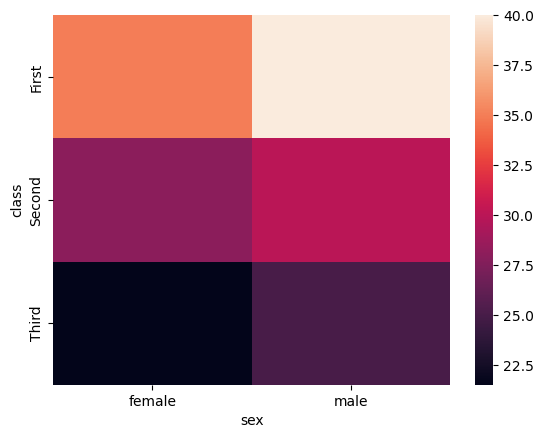

In [39]:
sns.heatmap(titanic.pivot_table('age', index='class', columns='sex', aggfunc='median'))